# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key

'33b1da90ff6fd6a474638ec79a21366a'

In [3]:
todays_date = datetime.today().date()
date = todays_date.strftime('%Y-%m-%d')
date

'2024-01-02'

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
np.random.seed(42)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q={cities}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=33b1da90ff6fd6a474638ec79a21366a&q=[\'walvis bay\', \'olonkinbyen\', \'bethel\', \'saint-francois\', \'grytviken\', \'port elizabeth\', \'sandnessjoen\', \'tokar\', \'laojunmiao\', \'albany\', \'dudinka\', \'klyuchi\', \'waitangi\', \'puerto natales\', \'tolanaro\', \'colonia\', \'puerto baquerizo moreno\', \'ulladulla\', \'ocean pointe\', \'invercargill\', \'punta del este\', \'afaahiti\', \'jamestown\', \'thunder bay\', \'mitu\', \'da nang\', \'bredasdorp\', \'punta cana\', \'port alfred\', \'port-aux-francais\', \'iqaluit\', \'isafjordur\', \'sitka\', \'adamstown\', \'yuma\', \'luanda\', \'taiohae\', \'thompson\', \'queenstown\', \'mhamid\', \'margaret river\', \'mbaiki\', \'kailua-kona\', \'bilibino\', "slobozhans\'ke", \'udachny\', \'ust-nera\', \'ciudad de huajuapan de leon\', \'yellowknife\', \'blackmans bay\', \'broken hill\', \'ribas do rio pardo\', \'ancud\', \'kodinsk\', \'coquimbo\', \'nova sintra\', \'kodiak\', \'vatuti

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url) # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=walvis bay&appid=33b1da90ff6fd6a474638ec79a21366a&units=metric
Processing Record 1 of Set 1 | walvis bay
http://api.openweathermap.org/data/2.5/weather?q=olonkinbyen&appid=33b1da90ff6fd6a474638ec79a21366a&units=metric
Processing Record 2 of Set 1 | olonkinbyen
http://api.openweathermap.org/data/2.5/weather?q=bethel&appid=33b1da90ff6fd6a474638ec79a21366a&units=metric
Processing Record 3 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?q=saint-francois&appid=33b1da90ff6fd6a474638ec79a21366a&units=metric
Processing Record 4 of Set 1 | saint-francois
http://api.openweathermap.org/data/2.5/weather?q=grytviken&appid=33b1da90ff6fd6a474638ec79a21366a&units=metric
Processing Record 5 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth&appid=33b1da90ff6fd6a474638ec79a21366a&units=metric
Processing Record 6 of Set 1 | port elizabeth
http://a

In [7]:
# Check data to see what it looks like
city_data

[{'City': 'walvis bay',
  'Lat': -22.9575,
  'Lng': 14.5053,
  'Max Temp': 27.53,
  'Humidity': 47,
  'Cloudiness': 0,
  'Wind Speed': 4.63,
  'Country': 'NA',
  'Date': 1704195996},
 {'City': 'olonkinbyen',
  'Lat': 70.9221,
  'Lng': -8.7187,
  'Max Temp': 0.22,
  'Humidity': 97,
  'Cloudiness': 100,
  'Wind Speed': 3.65,
  'Country': 'SJ',
  'Date': 1704195997},
 {'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': -2.95,
  'Humidity': 75,
  'Cloudiness': 0,
  'Wind Speed': 1.54,
  'Country': 'US',
  'Date': 1704195807},
 {'City': 'saint-francois',
  'Lat': 46.4154,
  'Lng': 3.9054,
  'Max Temp': 10.69,
  'Humidity': 68,
  'Cloudiness': 100,
  'Wind Speed': 5.66,
  'Country': 'FR',
  'Date': 1704195997},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 1.73,
  'Humidity': 66,
  'Cloudiness': 93,
  'Wind Speed': 1.29,
  'Country': 'GS',
  'Date': 1704195997},
 {'City': 'port elizabeth',
  'Lat': -33.918,
  'Lng': 25.5701,
  'Max Temp': 29.5,
 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,walvis bay,-22.9575,14.5053,27.53,47,0,4.63,NA,1704195996
1,olonkinbyen,70.9221,-8.7187,0.22,97,100,3.65,SJ,1704195997
2,bethel,41.3712,-73.4140,-2.95,75,0,1.54,US,1704195807
3,saint-francois,46.4154,3.9054,10.69,68,100,5.66,FR,1704195997
4,grytviken,-54.2811,-36.5092,1.73,66,93,1.29,GS,1704195997


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,27.53,47,0,4.63,NaN,1704195996
1,olonkinbyen,70.9221,-8.7187,0.22,97,100,3.65,SJ,1704195997
2,bethel,41.3712,-73.4140,-2.95,75,0,1.54,US,1704195807
3,saint-francois,46.4154,3.9054,10.69,68,100,5.66,FR,1704195997
4,grytviken,-54.2811,-36.5092,1.73,66,93,1.29,GS,1704195997


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

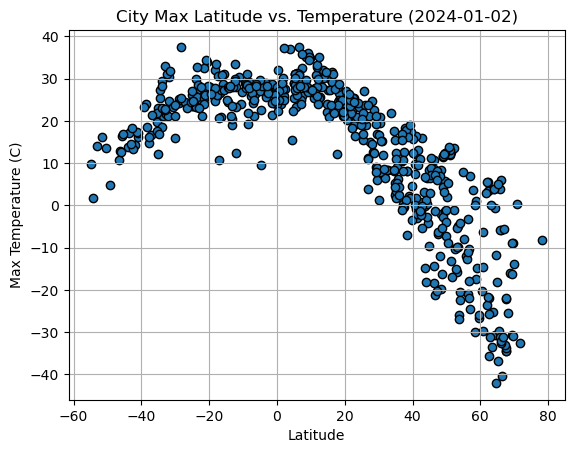

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')


# Incorporate the other graph properties
#plt.figure(figsize=(8,6))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

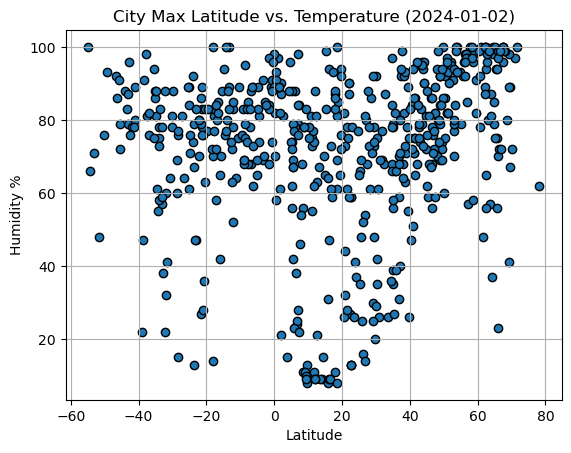

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

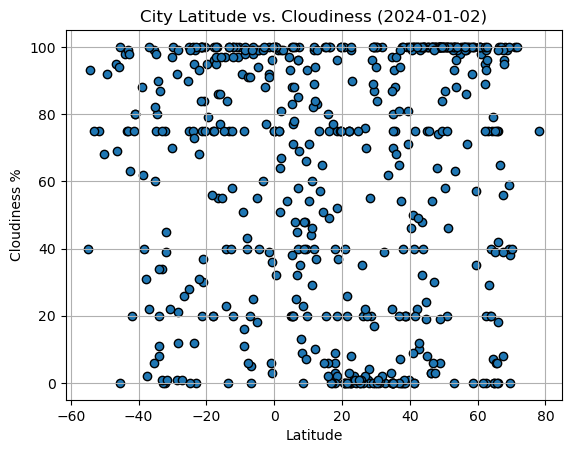

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

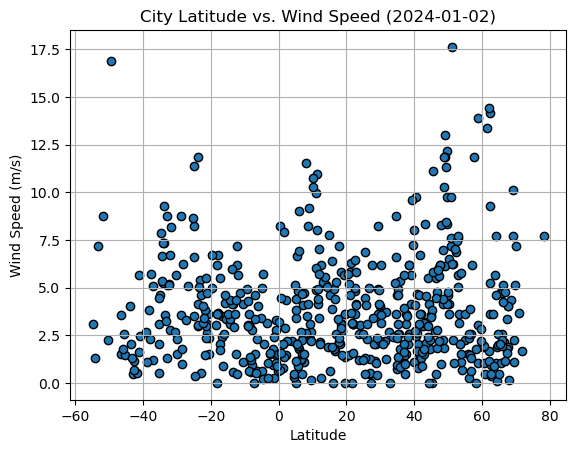

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
    slope, intercept = np.polyfit(x_values, y_values, 1)
    correlation = st.pearsonr(x_values, y_values)

    print(f'The r-value is: {round(correlation[0],2)}')
    plt.annotate(line_eq, text_coordinates, color='red', fontsize=14)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r-')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,0.22,97,100,3.65,SJ,1704195997
2,bethel,41.3712,-73.4140,-2.95,75,0,1.54,US,1704195807
3,saint-francois,46.4154,3.9054,10.69,68,100,5.66,FR,1704195997
6,sandnessjoen,66.0217,12.6316,-5.88,23,0,2.57,NO,1704195998
7,tokar,18.4254,37.7290,26.63,61,96,5.81,SD,1704195998


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,27.53,47,0,4.63,NaN,1704195996
4,grytviken,-54.2811,-36.5092,1.73,66,93,1.29,GS,1704195997
5,port elizabeth,-33.9180,25.5701,29.50,78,20,9.26,ZA,1704195913
12,waitangi,-43.9535,-176.5597,13.79,88,98,4.02,NZ,1704195999
13,puerto natales,-51.7236,-72.4875,16.25,48,75,8.75,CL,1704195999


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.87


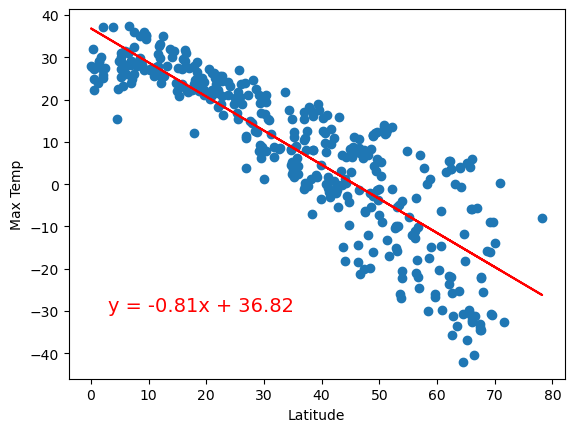

In [19]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', (3, -30))

The r-value is: 0.57


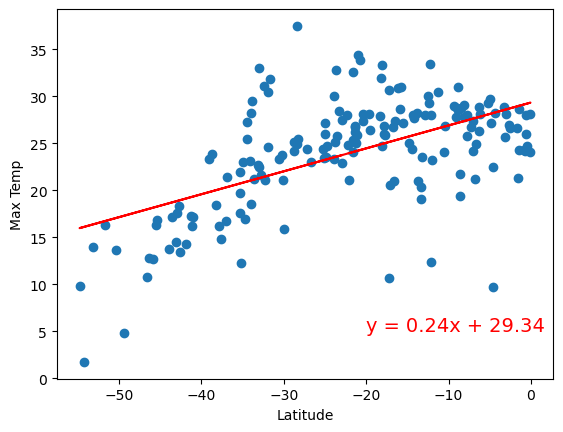

In [20]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', (-20, 5))

**Discussion about the linear relationship:** 
On January 2, 2024 in the Northern Hemisphere, the farther away from the equator, the lower the maximum temperature. These two factors are strongly correlated with an r value of -0.87. For every degree of latitude north, the average maximum temperature decreases by -0.81. 
On January 2, 2024 in the Southern Hemisphere, the closer to the equator, the higher the maximum temperature. These two factors are moderately correlated with an r value of 0.57. For every degree of latitude approaching the equator from the south, the average maximum temperature increases by 0.24.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42


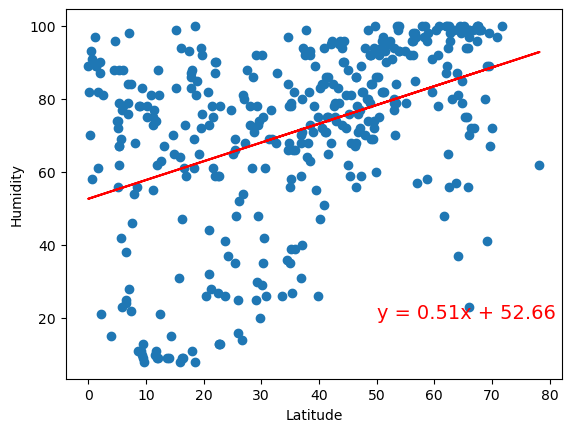

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (50, 20))

The r-value is: 0.11


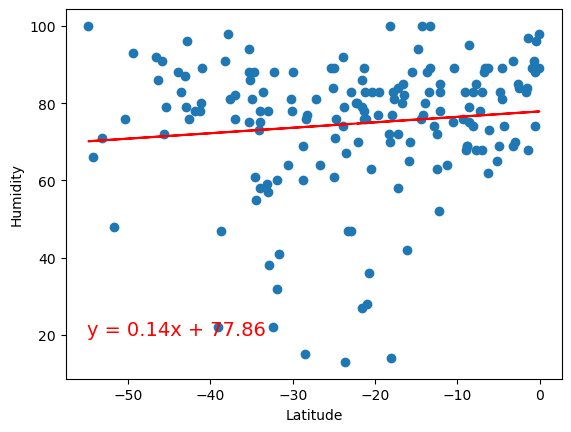

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-55,20))

**Discussion about the linear relationship:**
On January 2, 2024 in the Northern Hemisphere, the farther away from the equator, the humidity tends to increase. However, these two factors are only moderately correlated with an r value of 0.42. For every degree of latitude north, the average humidity increases by 0.51. 
On January 2, 2024 in the Southern Hemisphere, the closer to the equator, the humidity increases very slightly. These two factors are very mildly correlated with an r value of 0.11. For every degree of latitude approaching the equator from the south, the average humidity increases by 0.14.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15


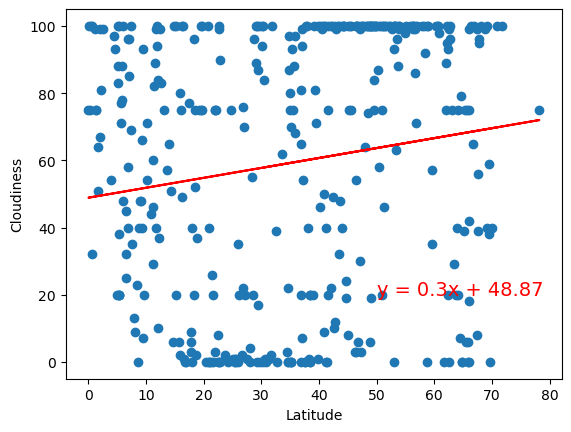

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (50,20))

The r-value is: 0.07


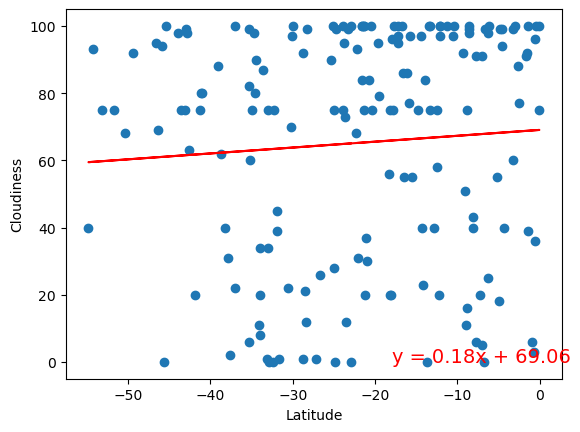

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-18,0))

**Discussion about the linear relationship:**
On January 2, 2024 in the Northern Hemisphere, the farther away from the equator, cloudiness increases slightly. These two factors are very mildly correlated with an r value of 0.15. For every degree of latitude north, the average cloudiness increases by 0.3. 
On January 2, 2024 in the Southern Hemisphere, the closer to the equator, cloudiness increases. These two factors are marginally correlated with an r value of 0.07. For every degree of latitude approaching the equator from the south, the average cloudiness increases by 0.18.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08


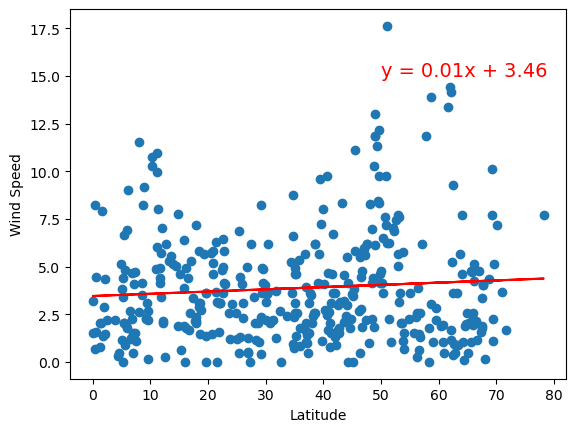

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (50,15))

The r-value is: -0.26


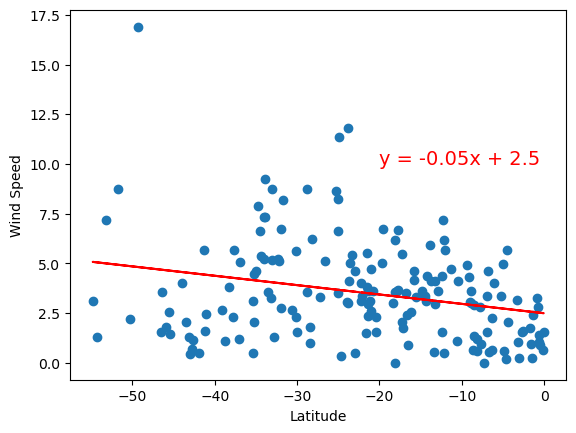

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-20,10))

**Discussion about the linear relationship:**
On January 2, 2024 in the Northern Hemisphere, there is only minute change in average wind speed the farther away from the equator. These two factors are marginally correlated with an r value of 0.08. For every degree of latitude north, the average wind speed increases by 0.01. 
On January 2, 2024 in the Southern Hemisphere, the closer to the equator, the average wind speed decreases. These two factors are moderately correlated with an r value of -0.26. For every degree of latitude approaching the equator from the south, the average wind speed decreases by -0.05.